Import Required Libraries

In [ ]:
import numpy as np
import cv2
from PIL import Image
import pytesseract
from google.colab.patches import cv2_imshow
import imutils
pytesseract.pytesseract.tesseract_cmd = r'/usr/local/bin/pytesseract'

Reading Meter Image

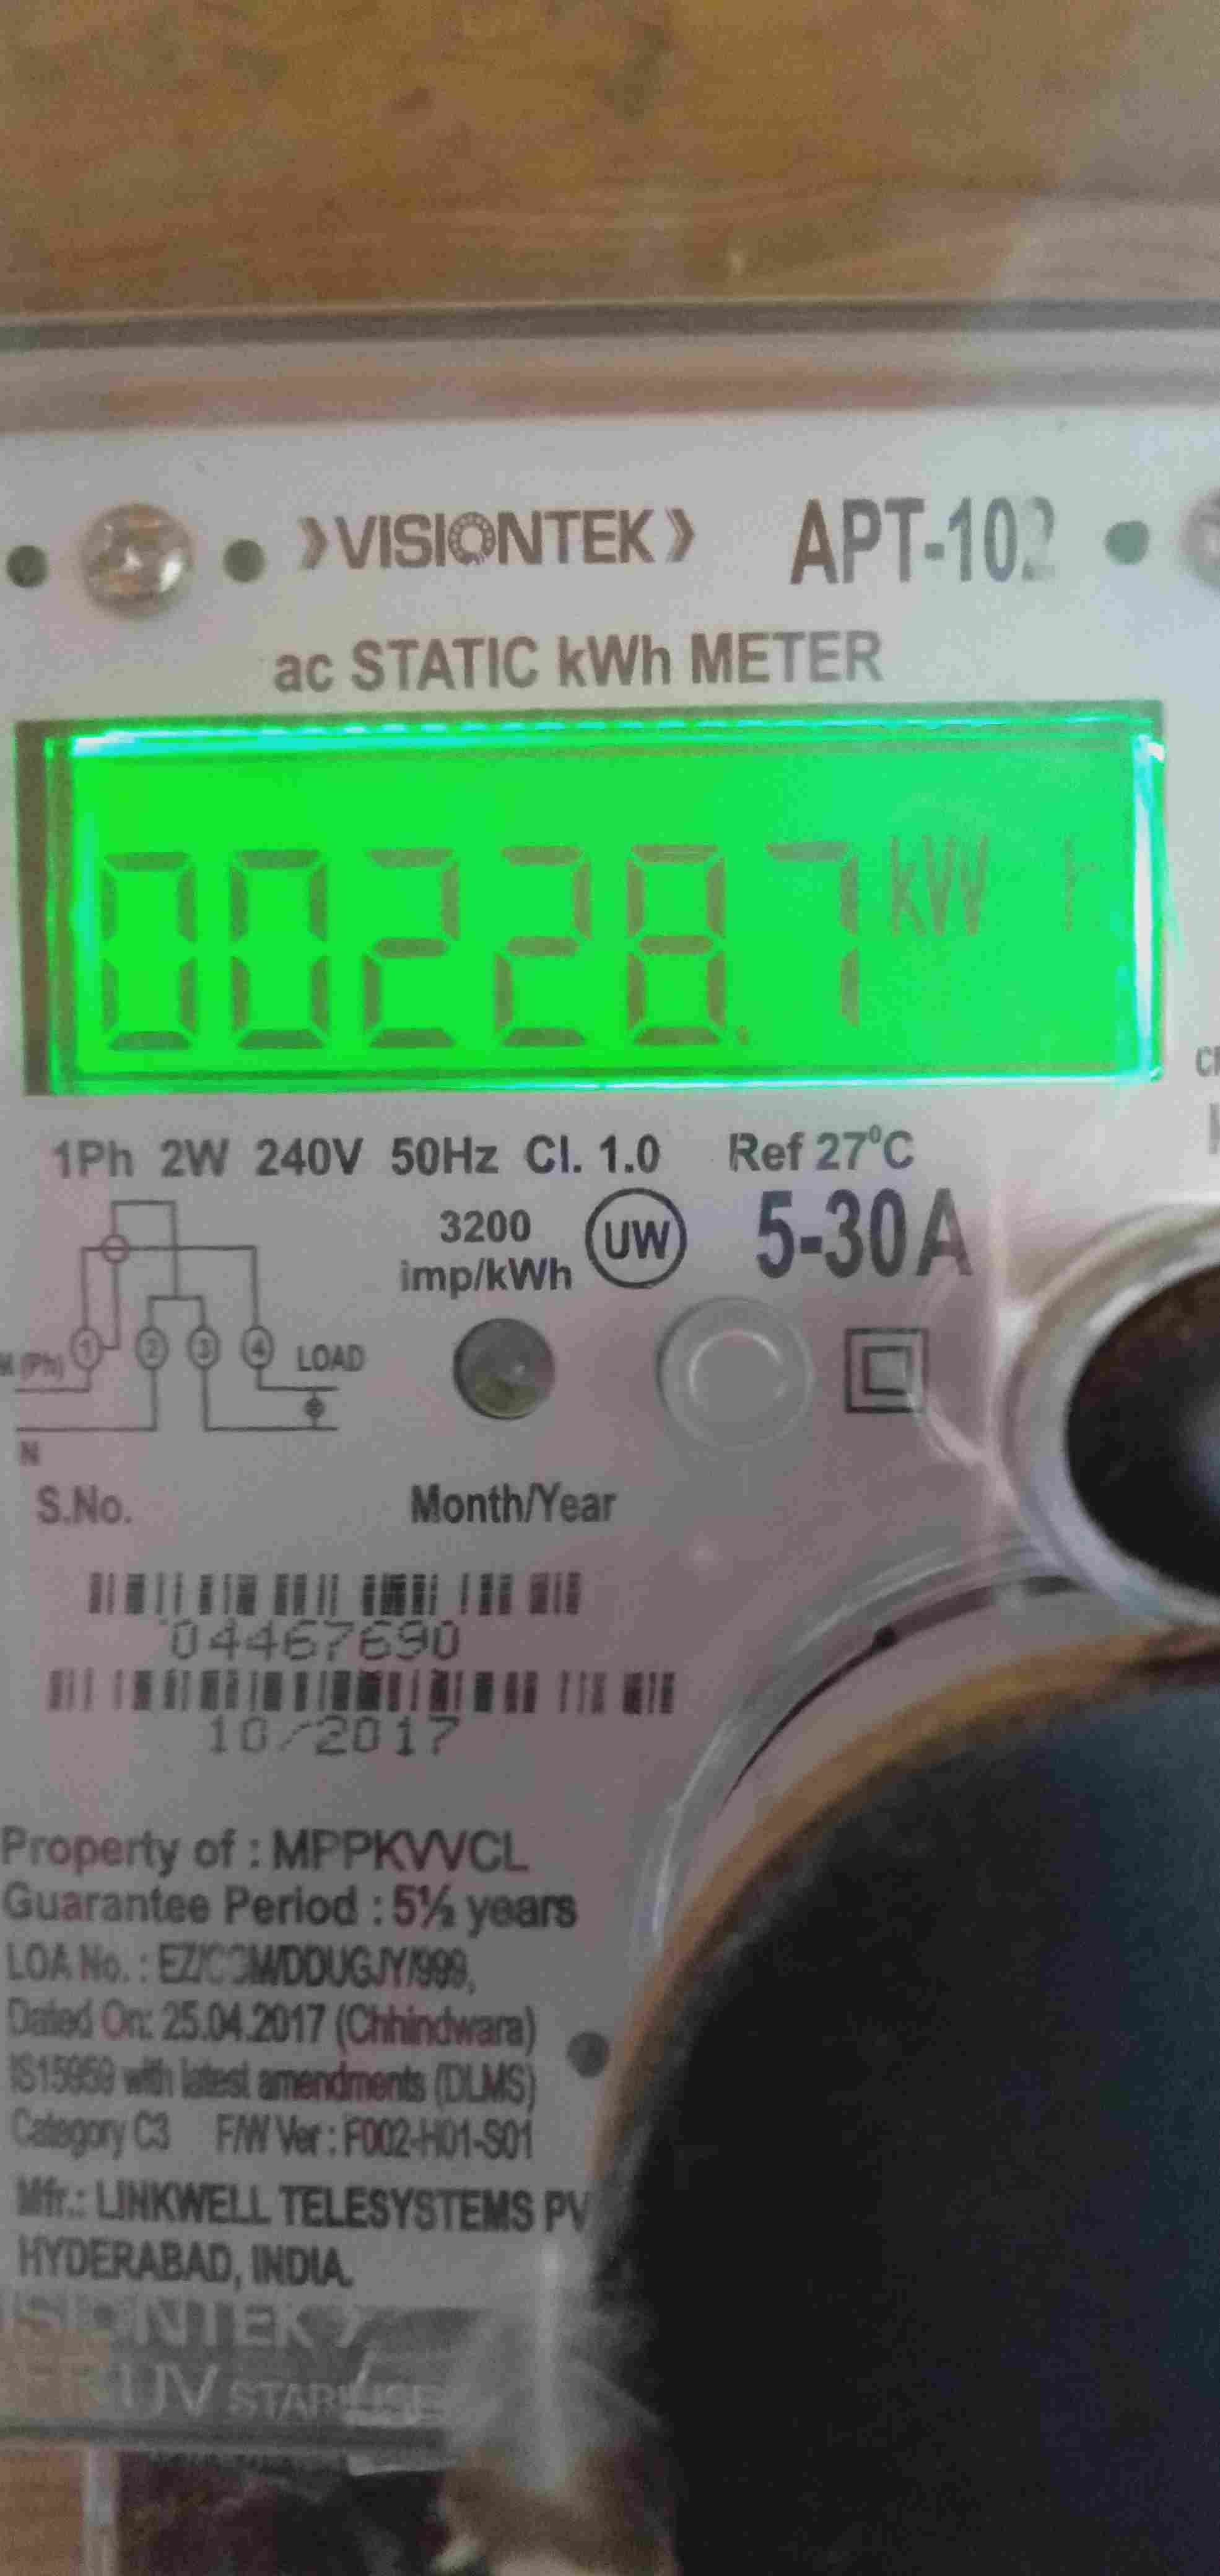

In [60]:
 img_meter_o = cv2.imread("example.png")
 cv2_imshow(img_meter_o)

Convert image from BGR TO HSV

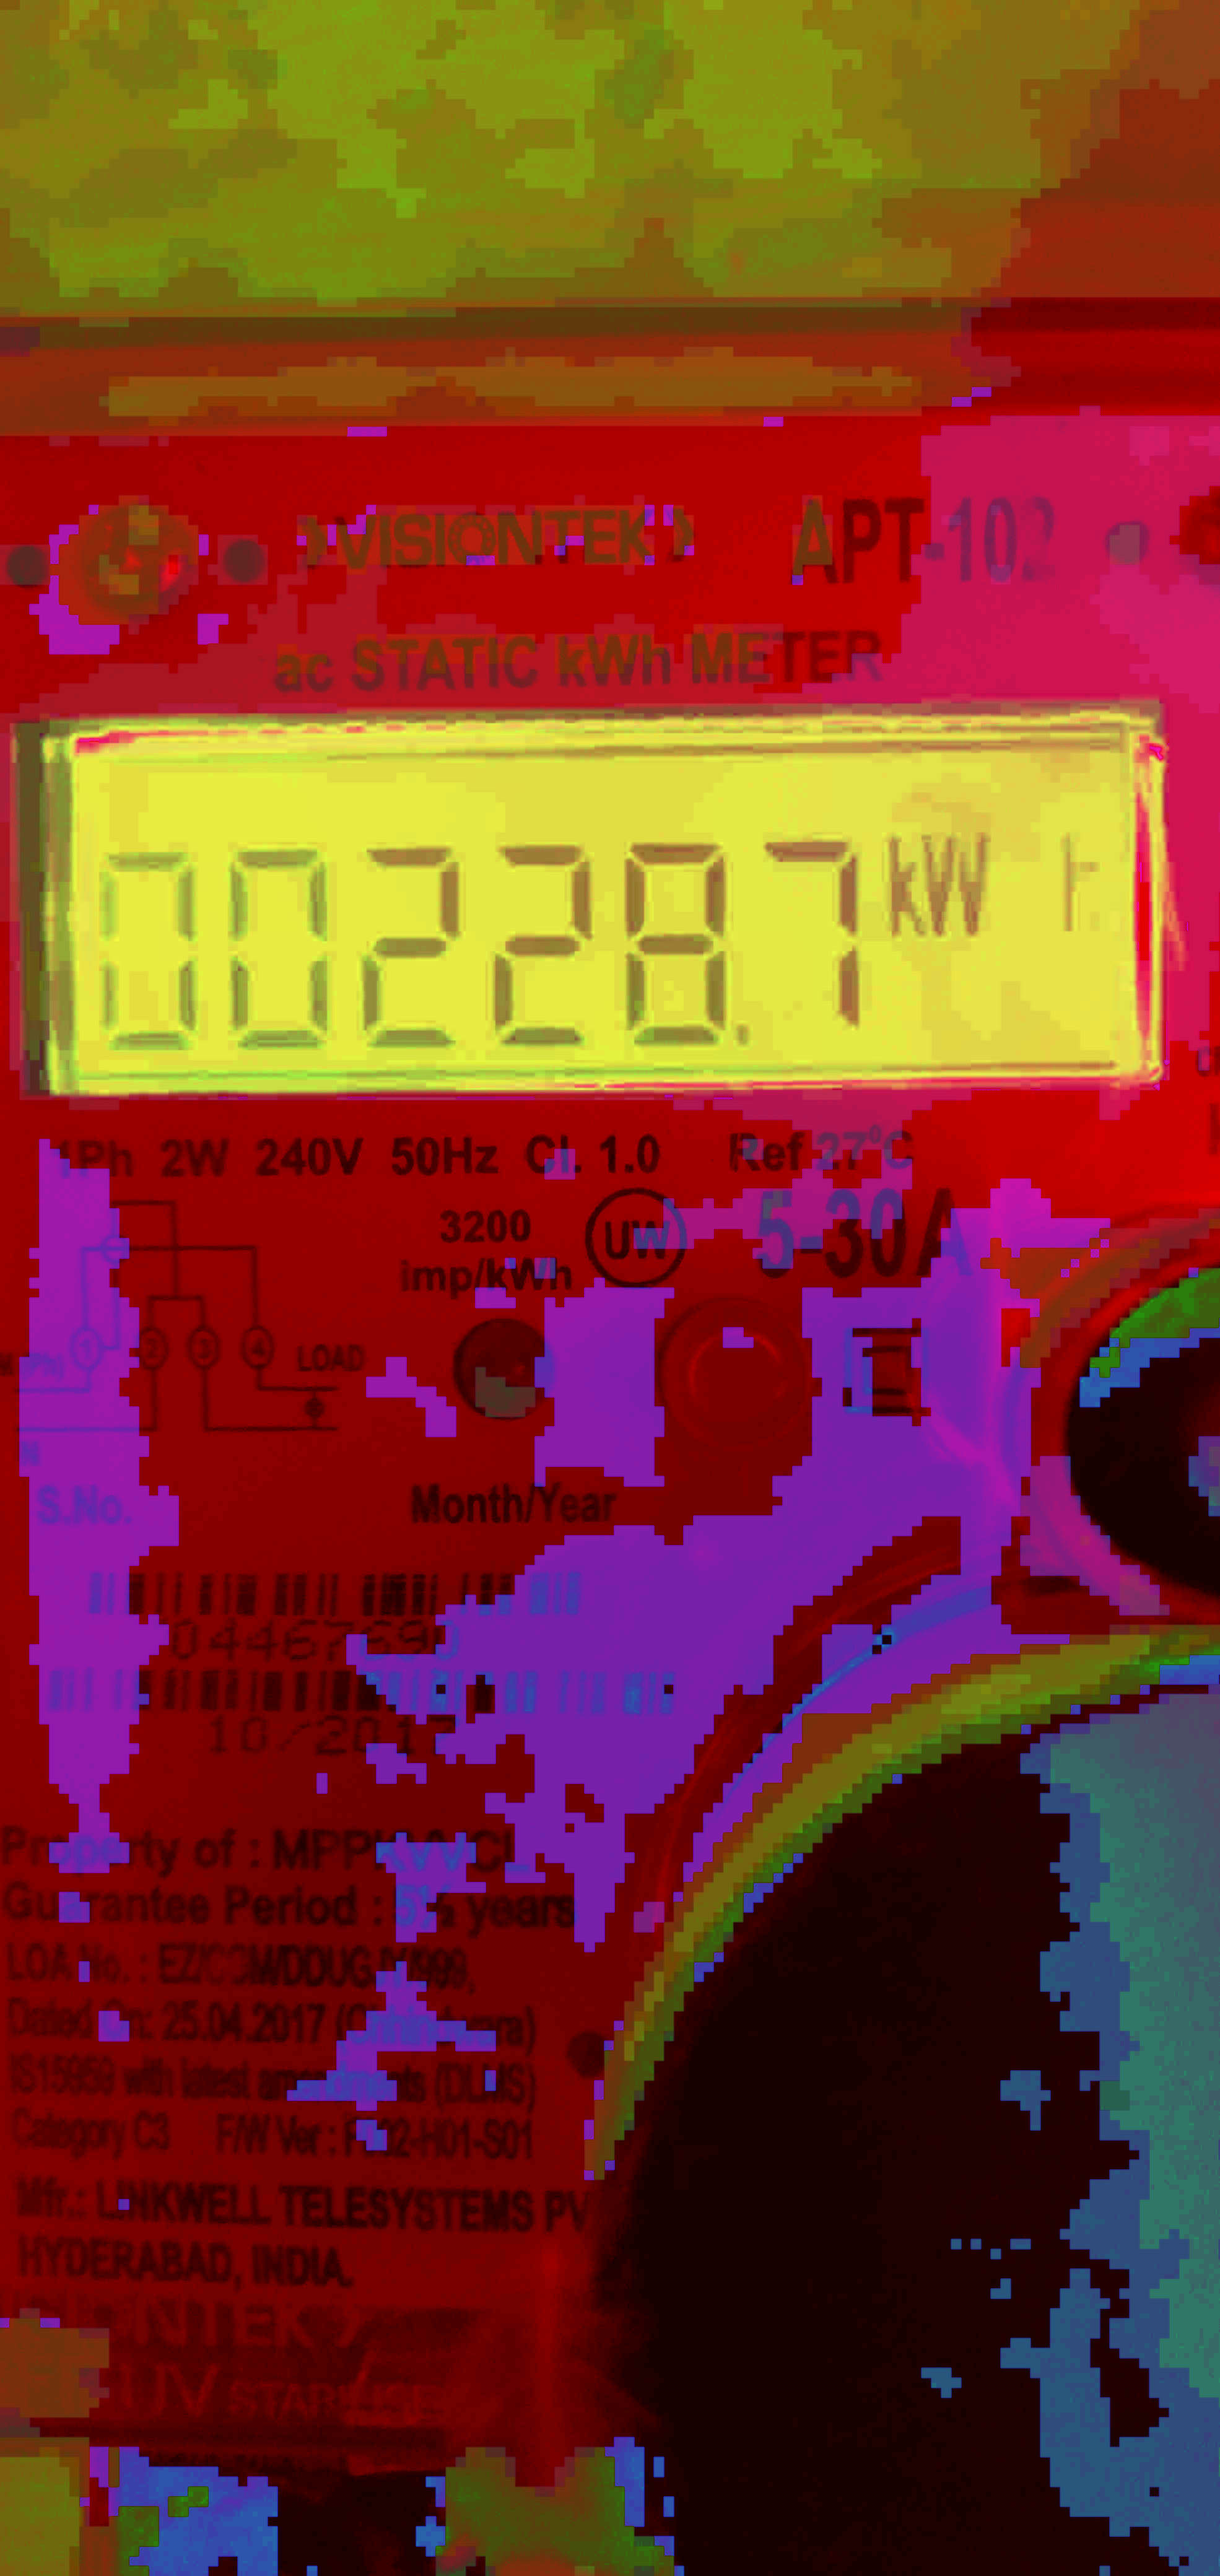

In [ ]:
img_meter = cv2.cvtColor(img_meter_o, cv2.COLOR_BGR2HSV)
cv2_imshow(img_meter)

Creating mask to get approx Region of Interest

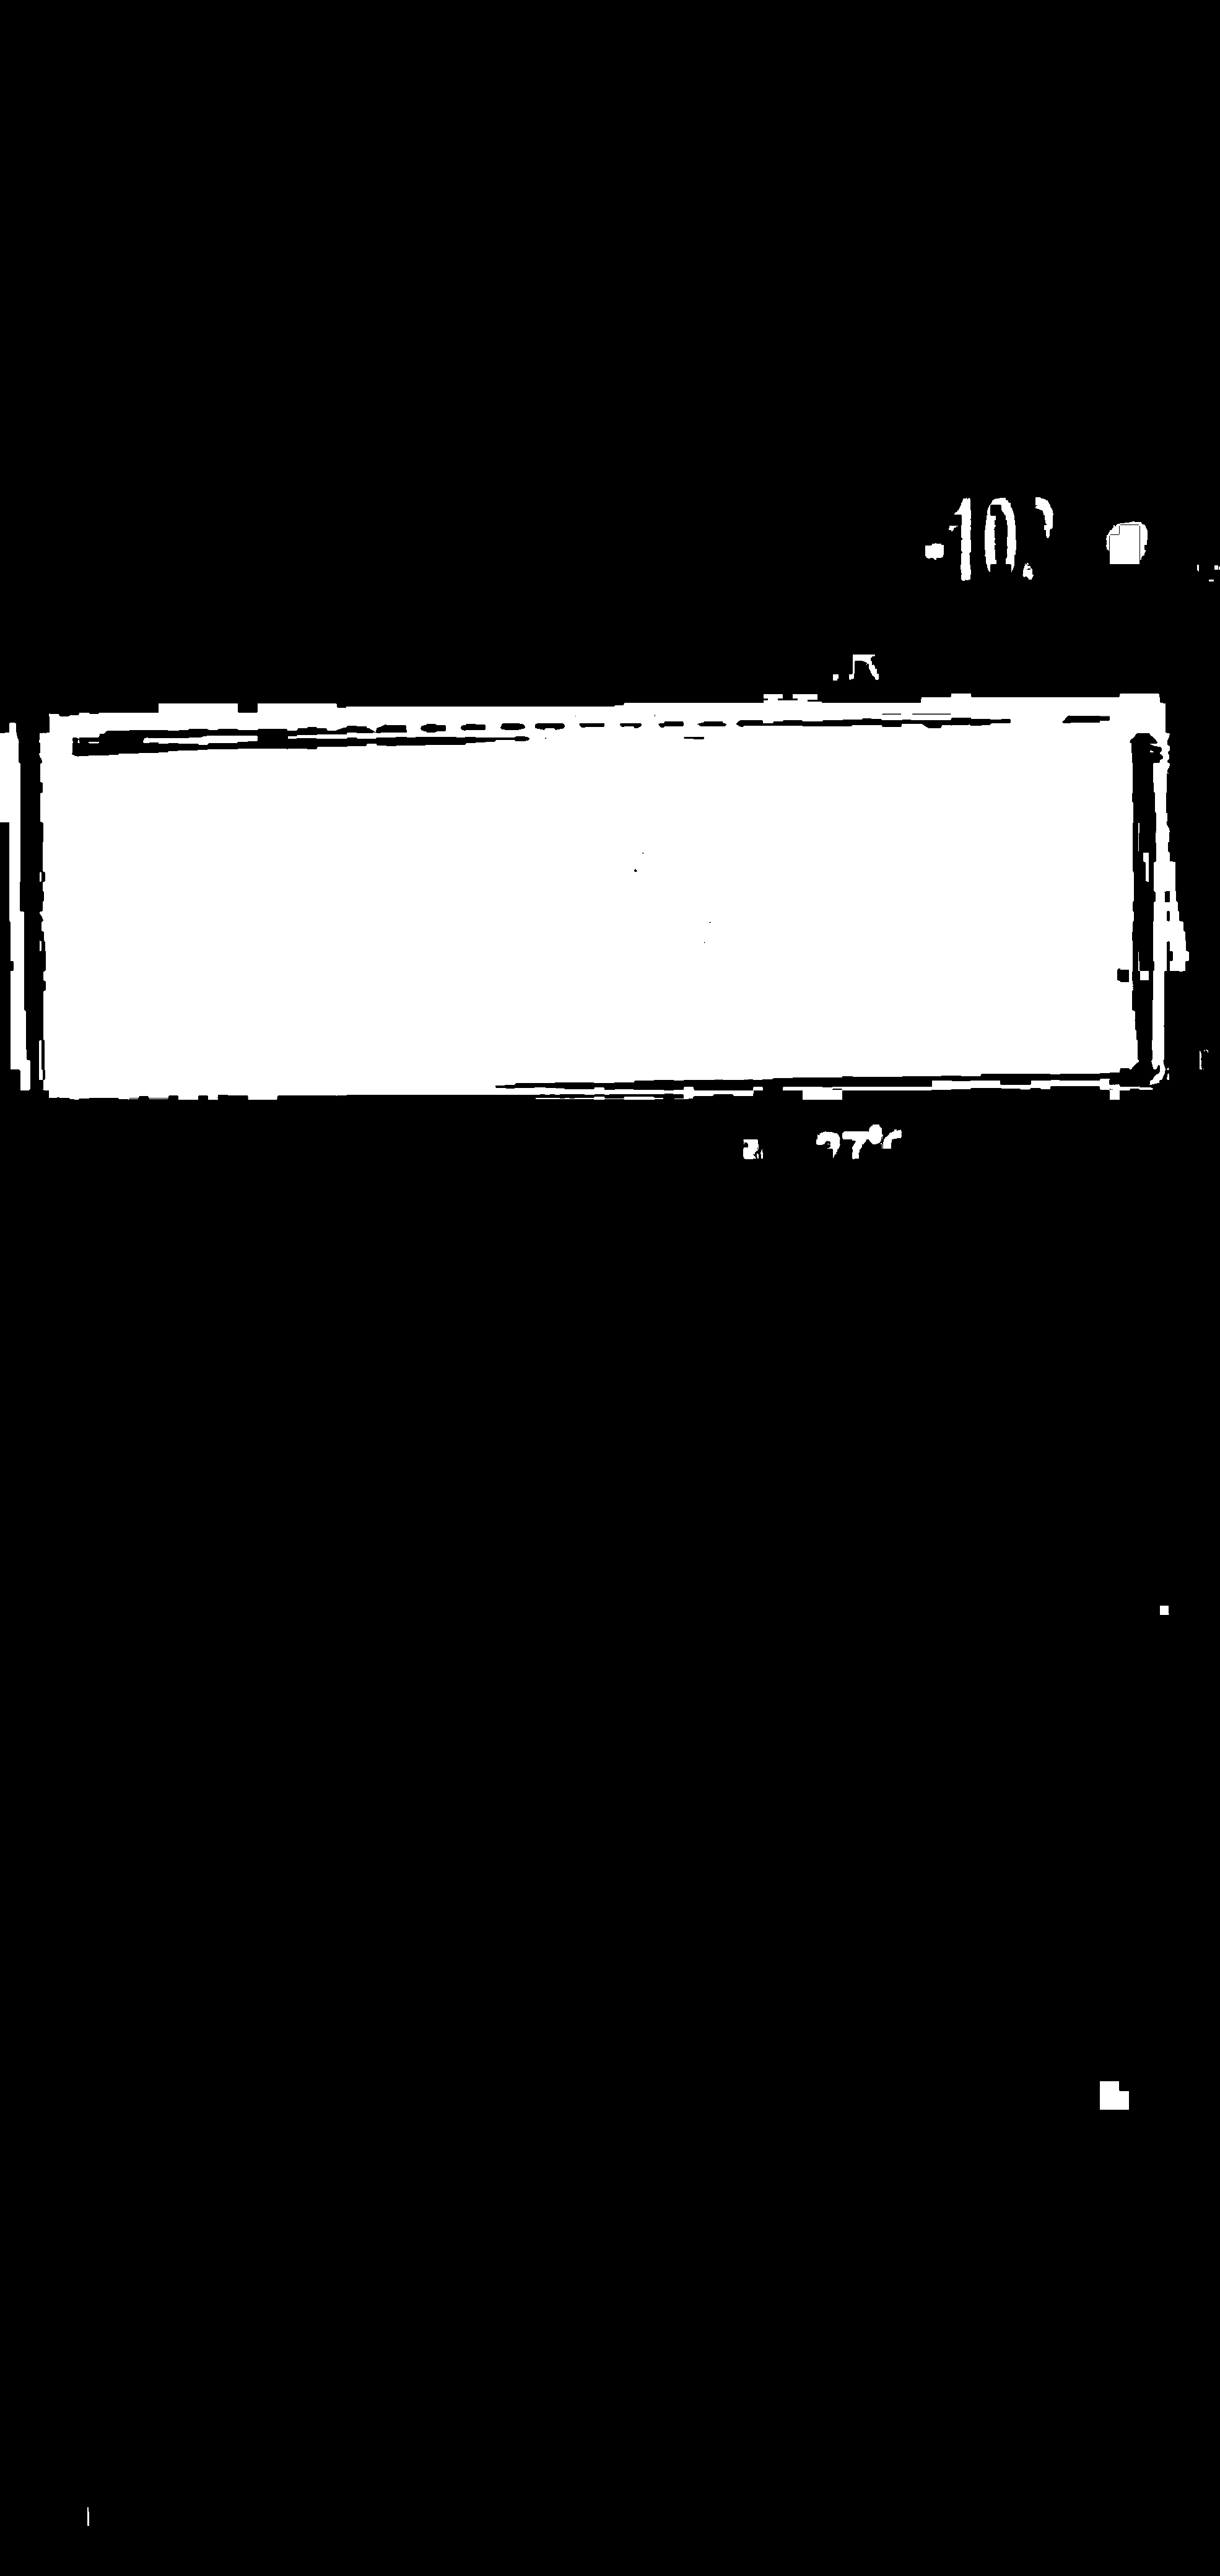

In [ ]:
 roi_lower = np.array([40, 25, 0])
 roi_upper = np.array( [80, 255, 255])
 mask = cv2.inRange(img_meter, roi_lower, roi_upper)
 cv2_imshow(mask)

Doing Bitwise AND mask image and original image to get ROI

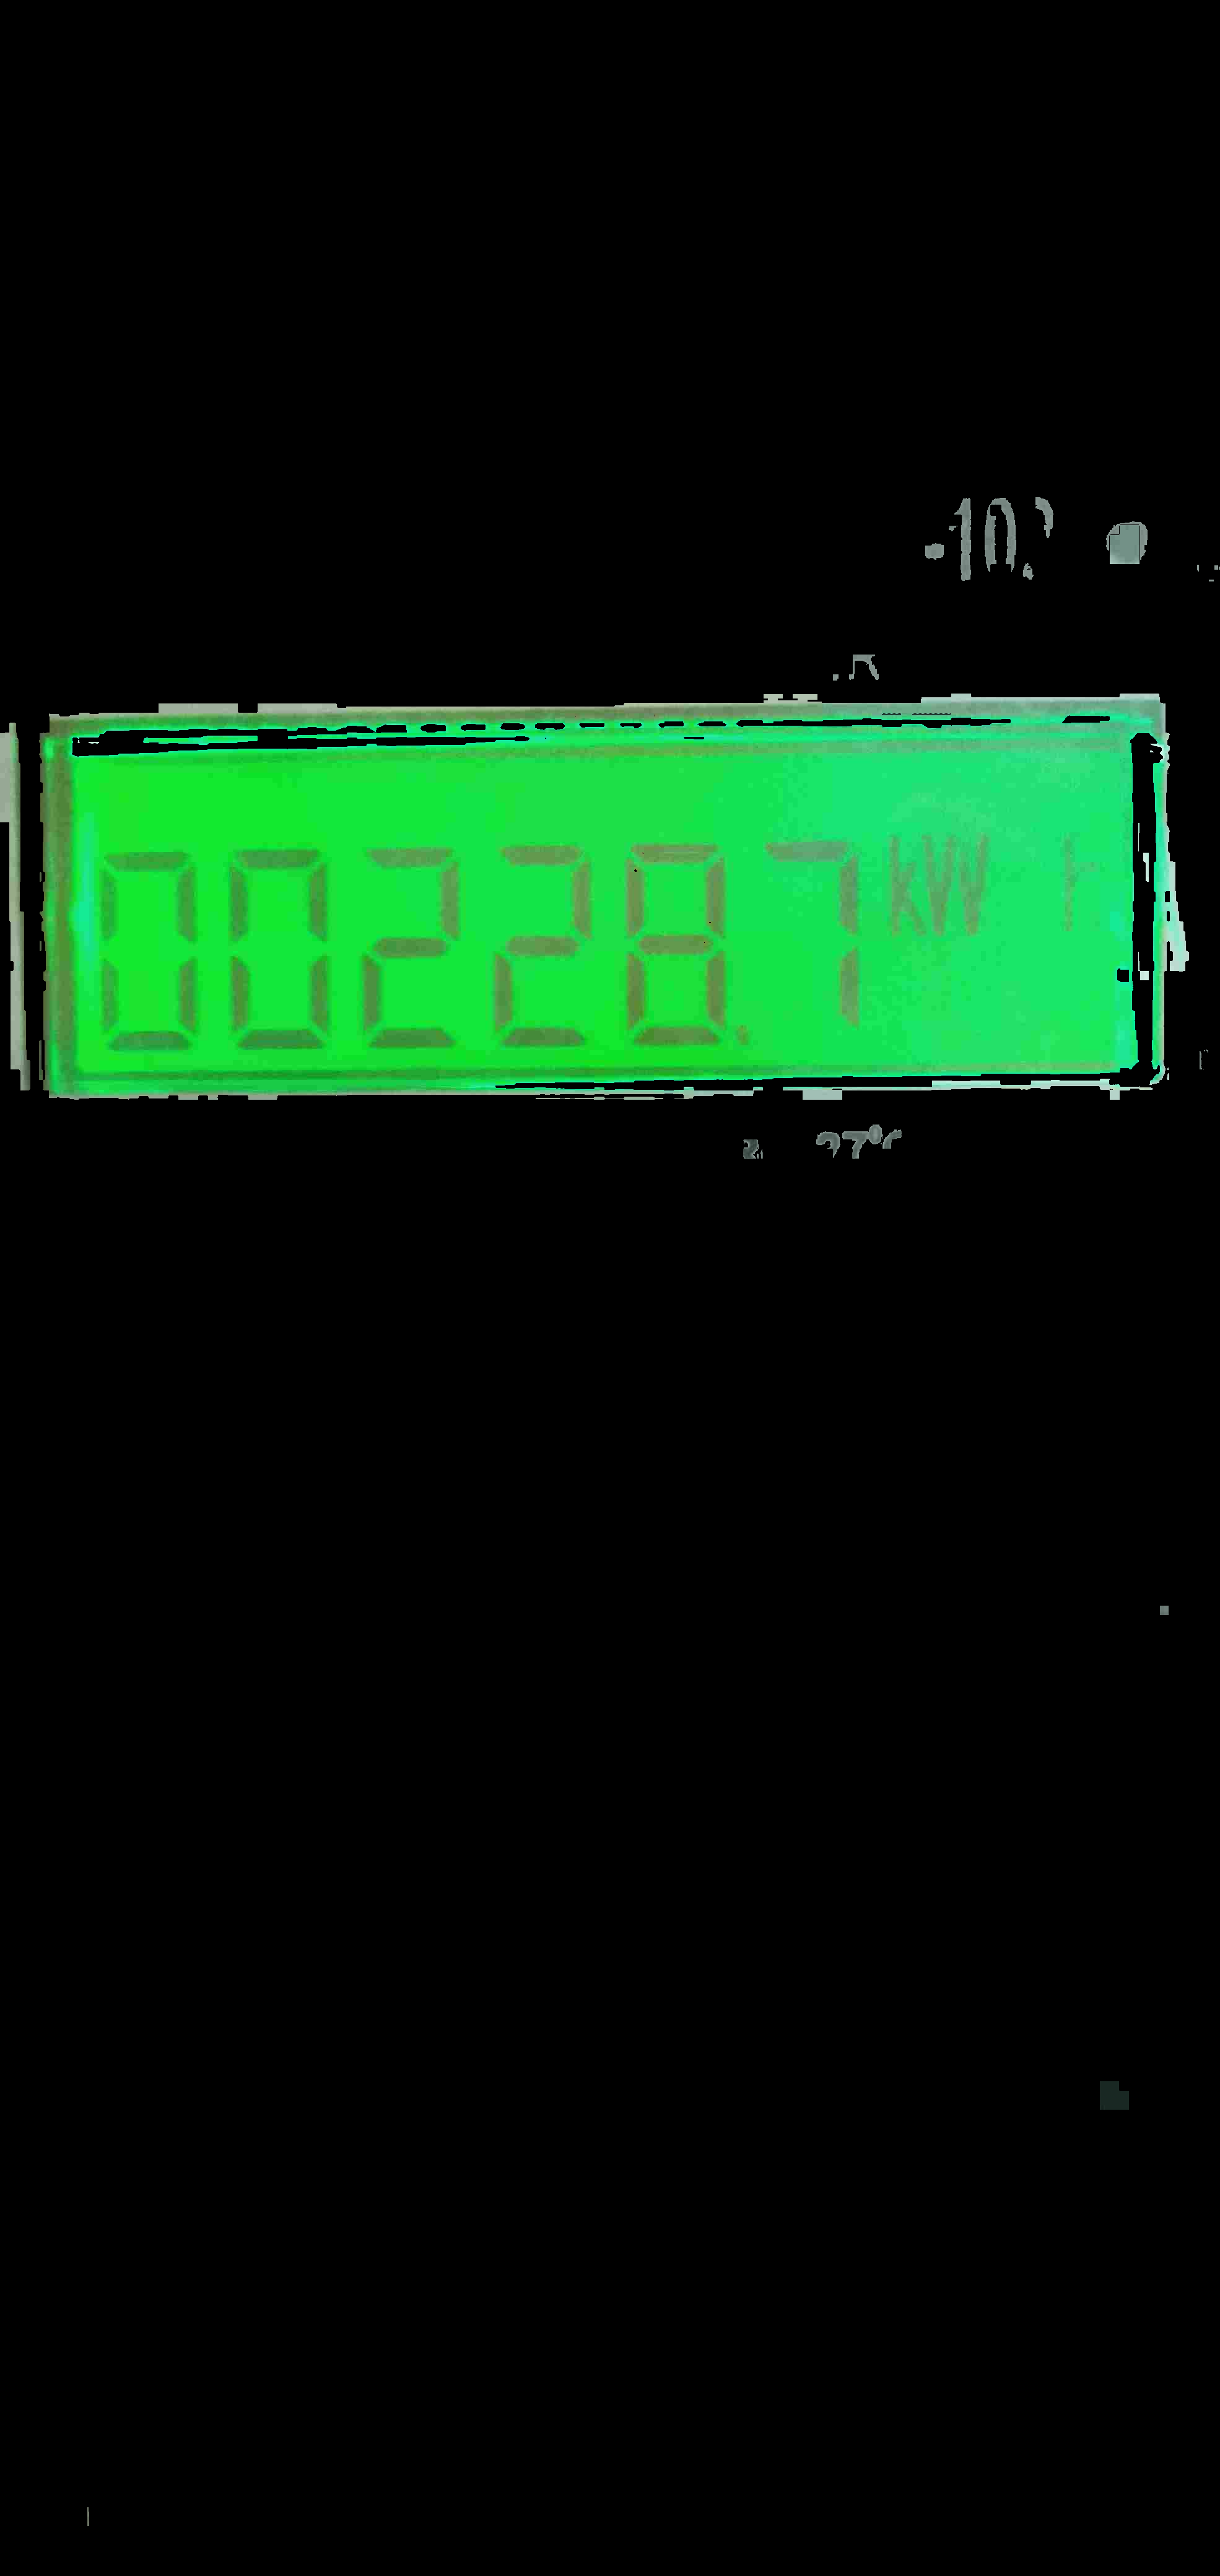

In [ ]:
img_meter = cv2.bitwise_and(img_meter_o,img_meter_o, mask= mask)
cv2_imshow(img_meter)

Finding image coutours to separate ROI

In [ ]:
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)

Doing some image pre-processing

In [ ]:
 for cnt in contours:
        (x, y, w, h) = cv2.boundingRect(cnt)
        wbuffer = 0.75 * w
        hbuffer = 0.1 * h
        img_meter_ext = img_meter_o[y:y + h + int(hbuffer), x:x + w + int(wbuffer)]
        
        img_meter_ext_gray = cv2.cvtColor(img_meter_ext, cv2.COLOR_BGR2GRAY)
        img_meter_ext_pp = cv2.adaptiveThreshold(img_meter_ext_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 199, 5)
        img_meter_ext_pp = cv2.medianBlur(img_meter_ext_pp, 13)
        cv2.rectangle(img_meter_o, (x, y), (x + w + int(wbuffer), y + h + int(hbuffer)), (255, 0, 255), 10)
        break

Extracted Region of Interest

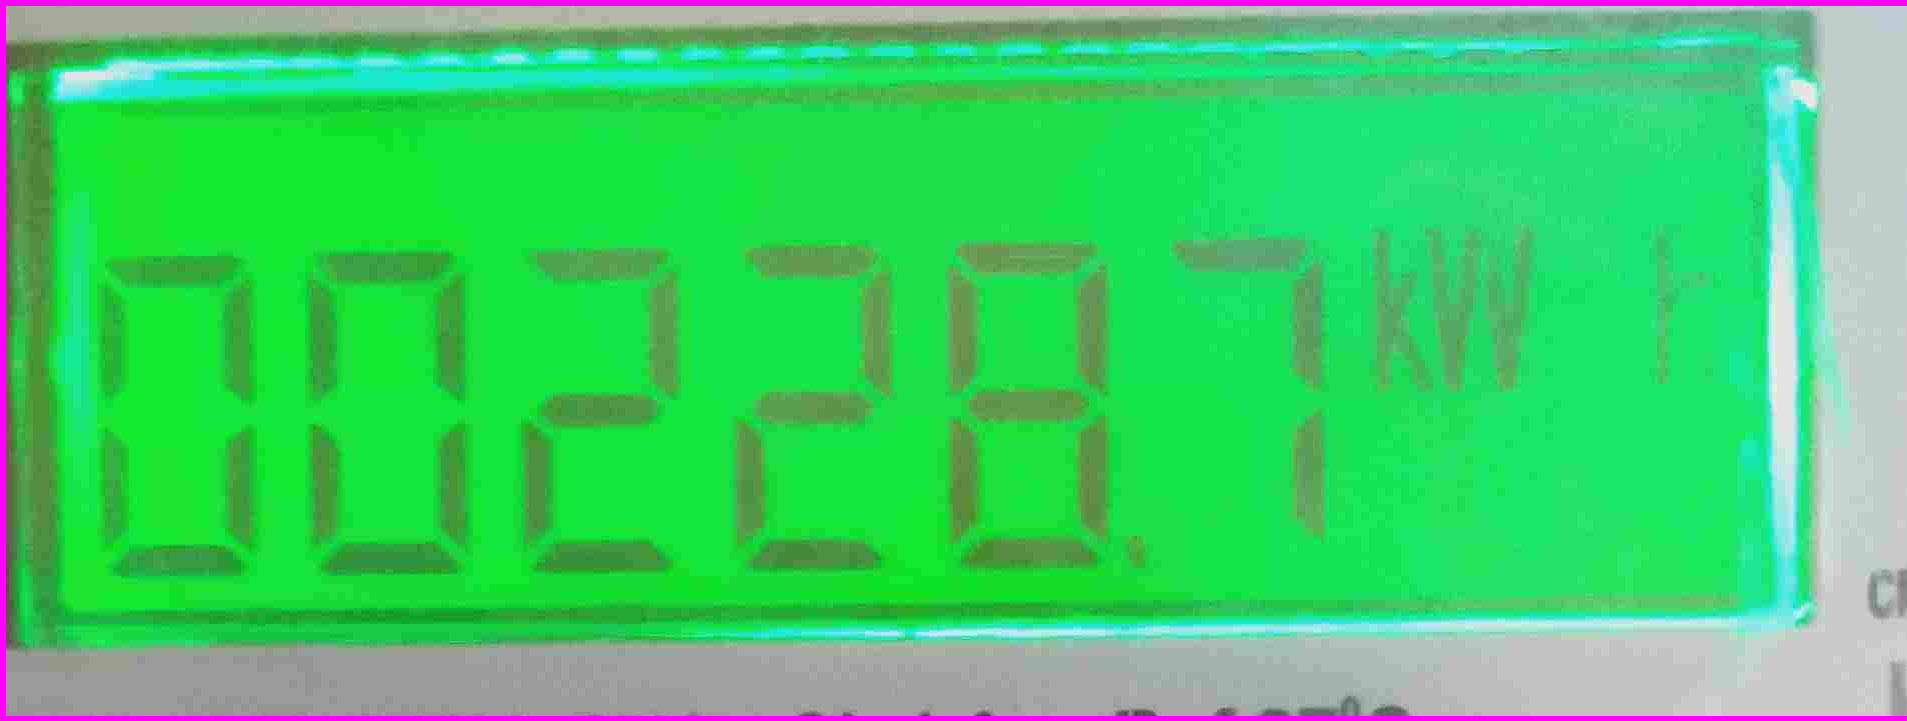

In [ ]:
cv2_imshow(img_meter_ext)

Grayish Region of Interest

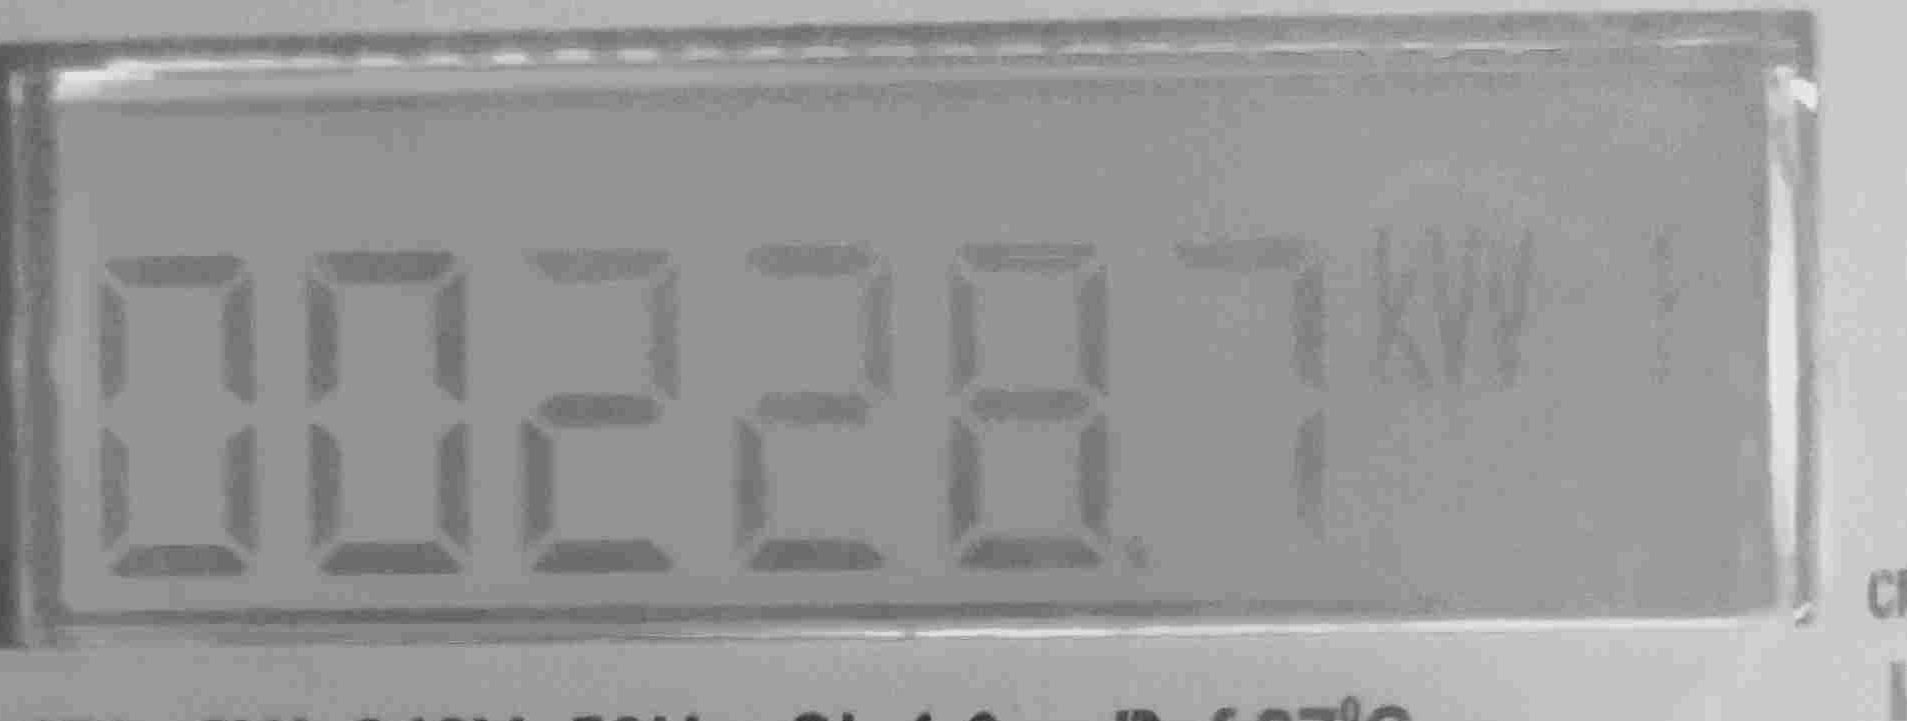

In [ ]:
cv2_imshow(img_meter_ext_gray)

Adaptive Thresholding

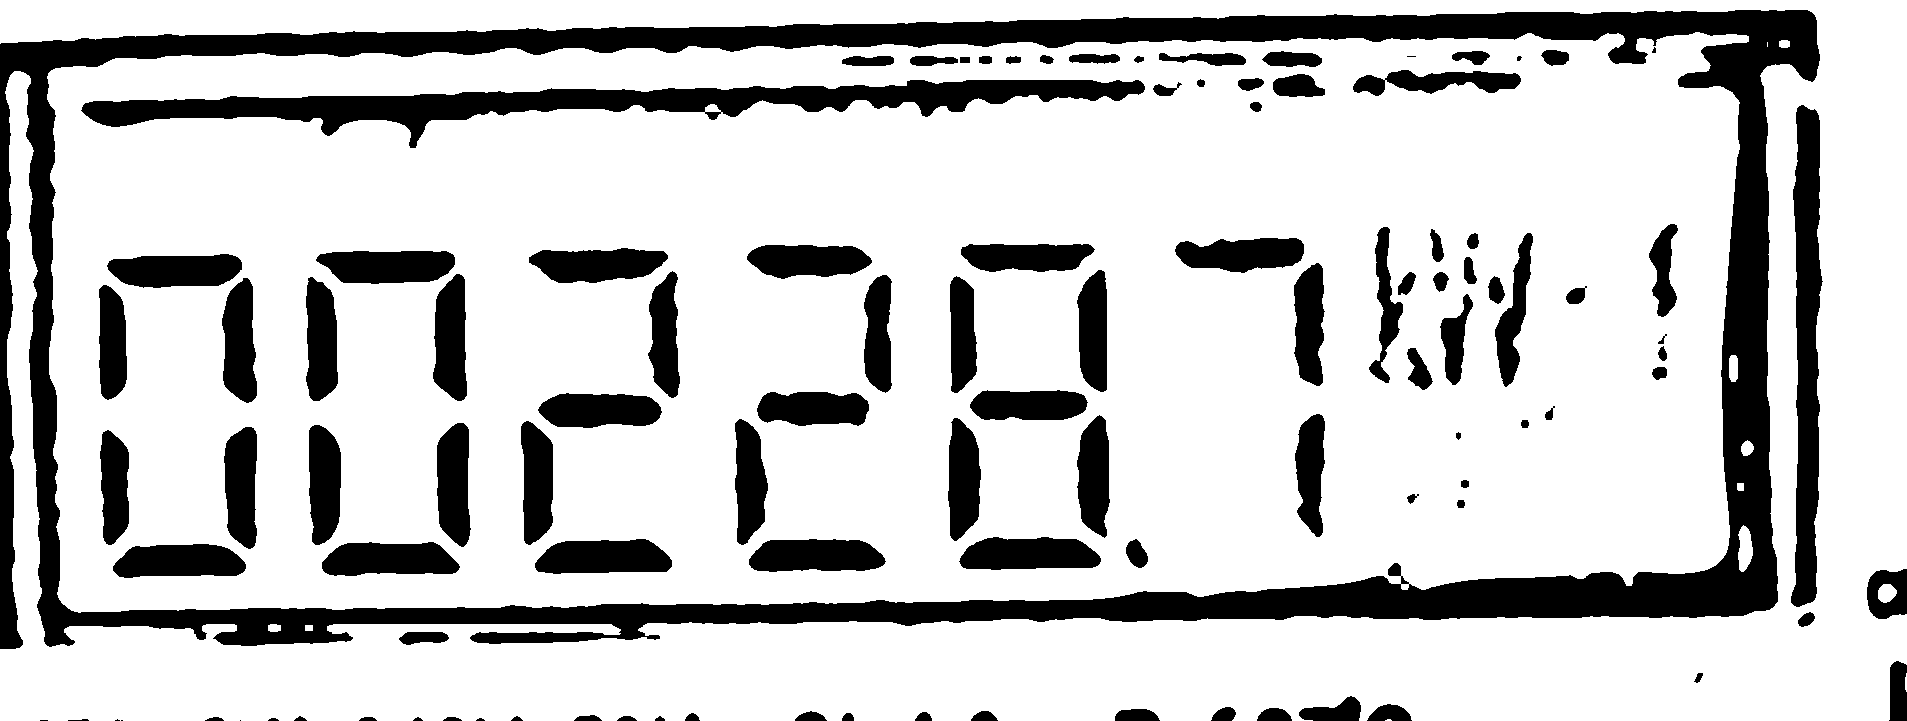

In [ ]:
cv2_imshow(img_meter_ext_pp)

Applying Gaussian Blur

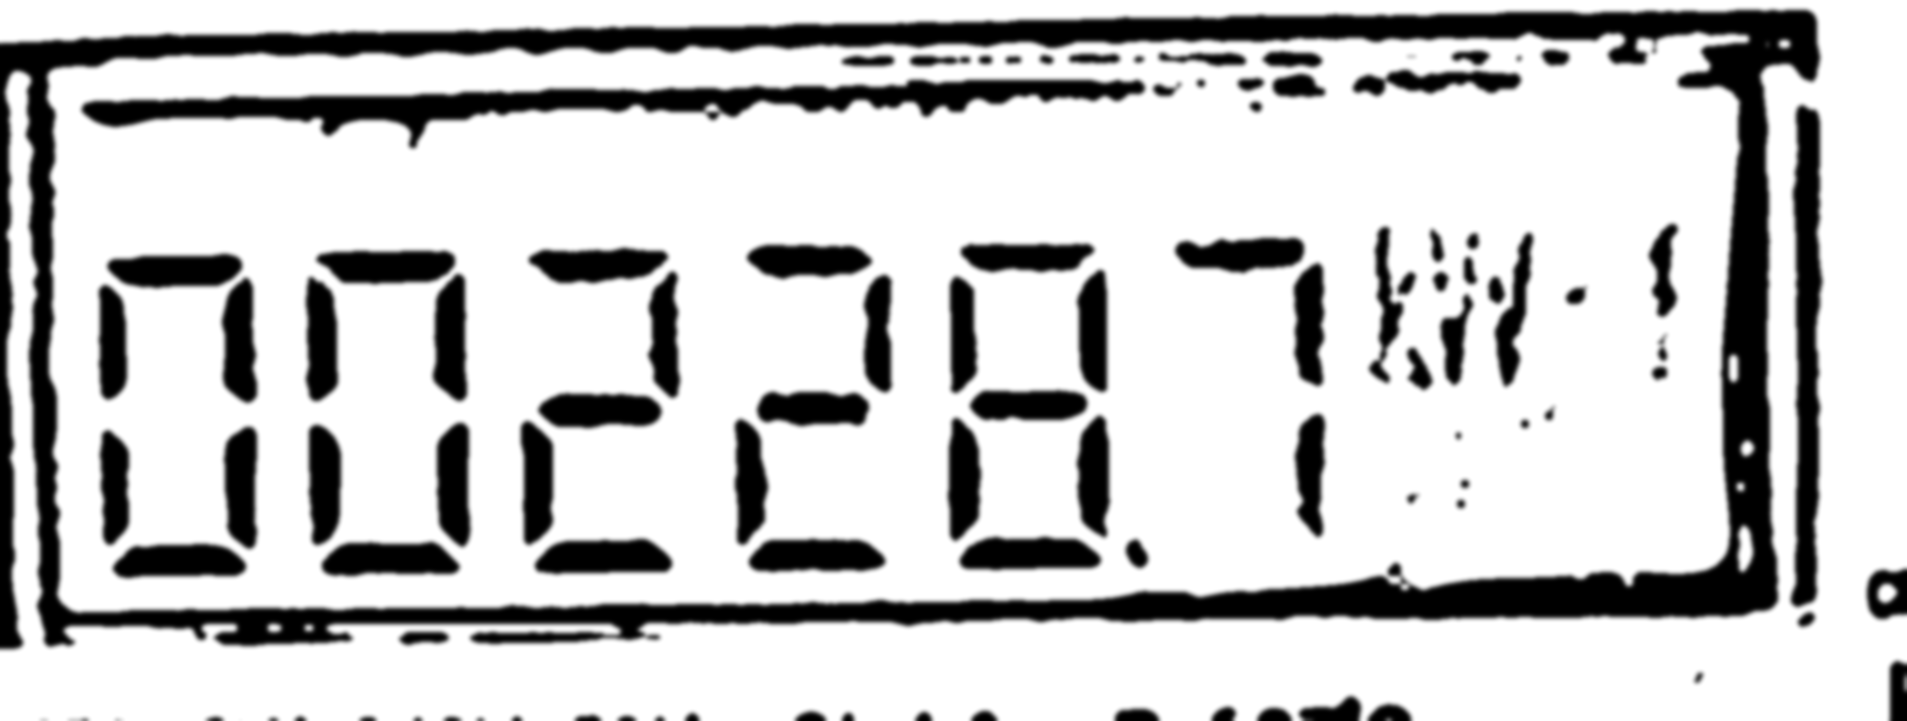

In [ ]:
blur = cv2.GaussianBlur(img_meter_ext_pp,(13,13), 0)
cv2_imshow(blur)

Applying Canny Edge Detection

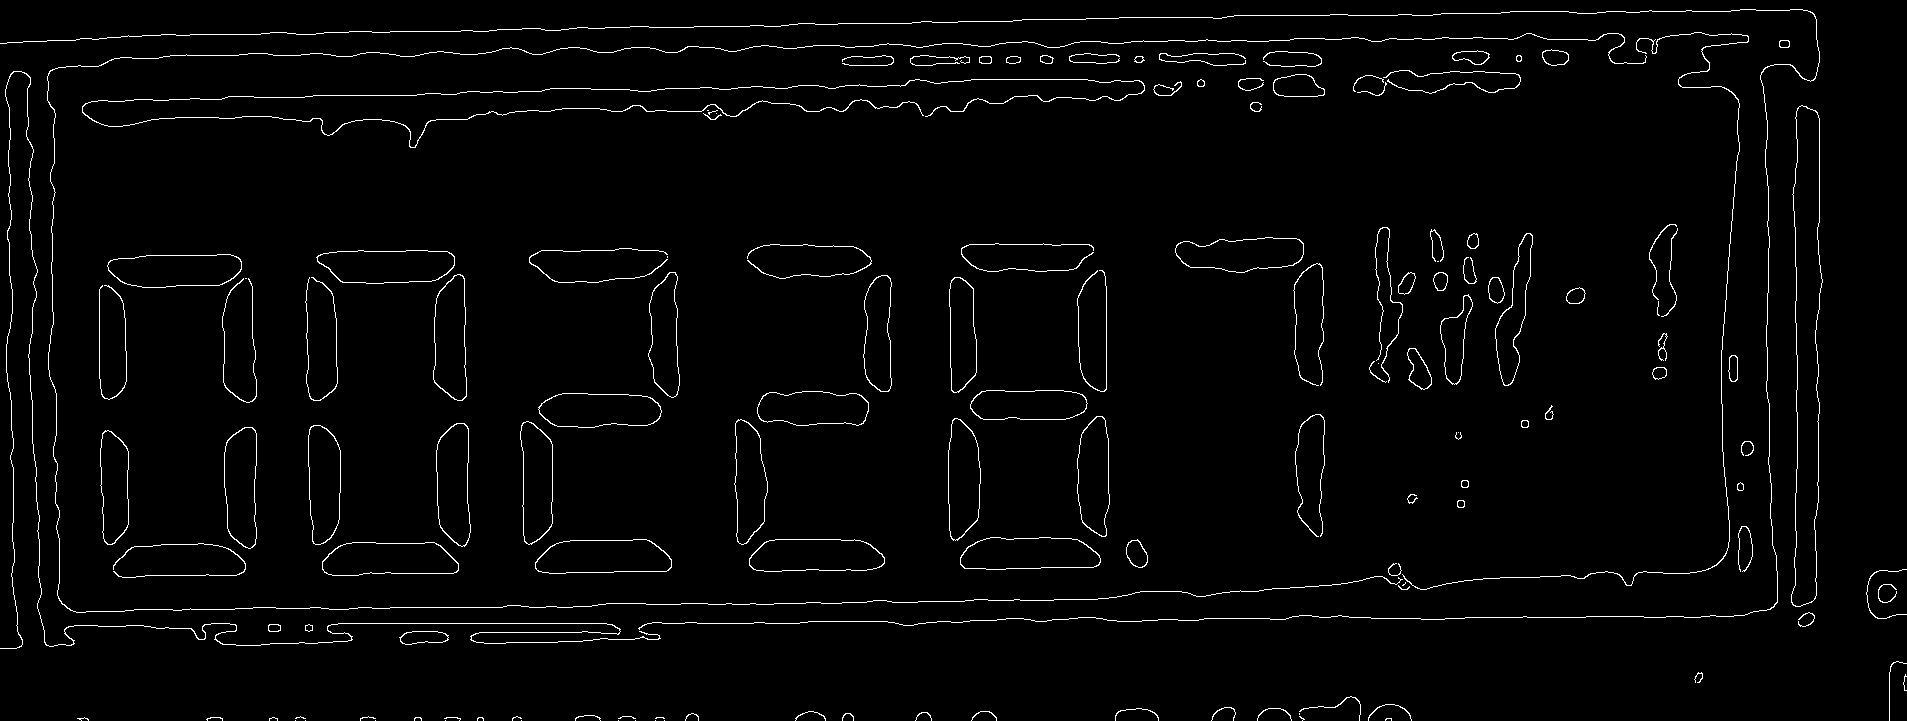

In [ ]:
edges = cv2.Canny(blur, threshold1=100, threshold2=200) 
cv2_imshow(edges)

Applying Dilution

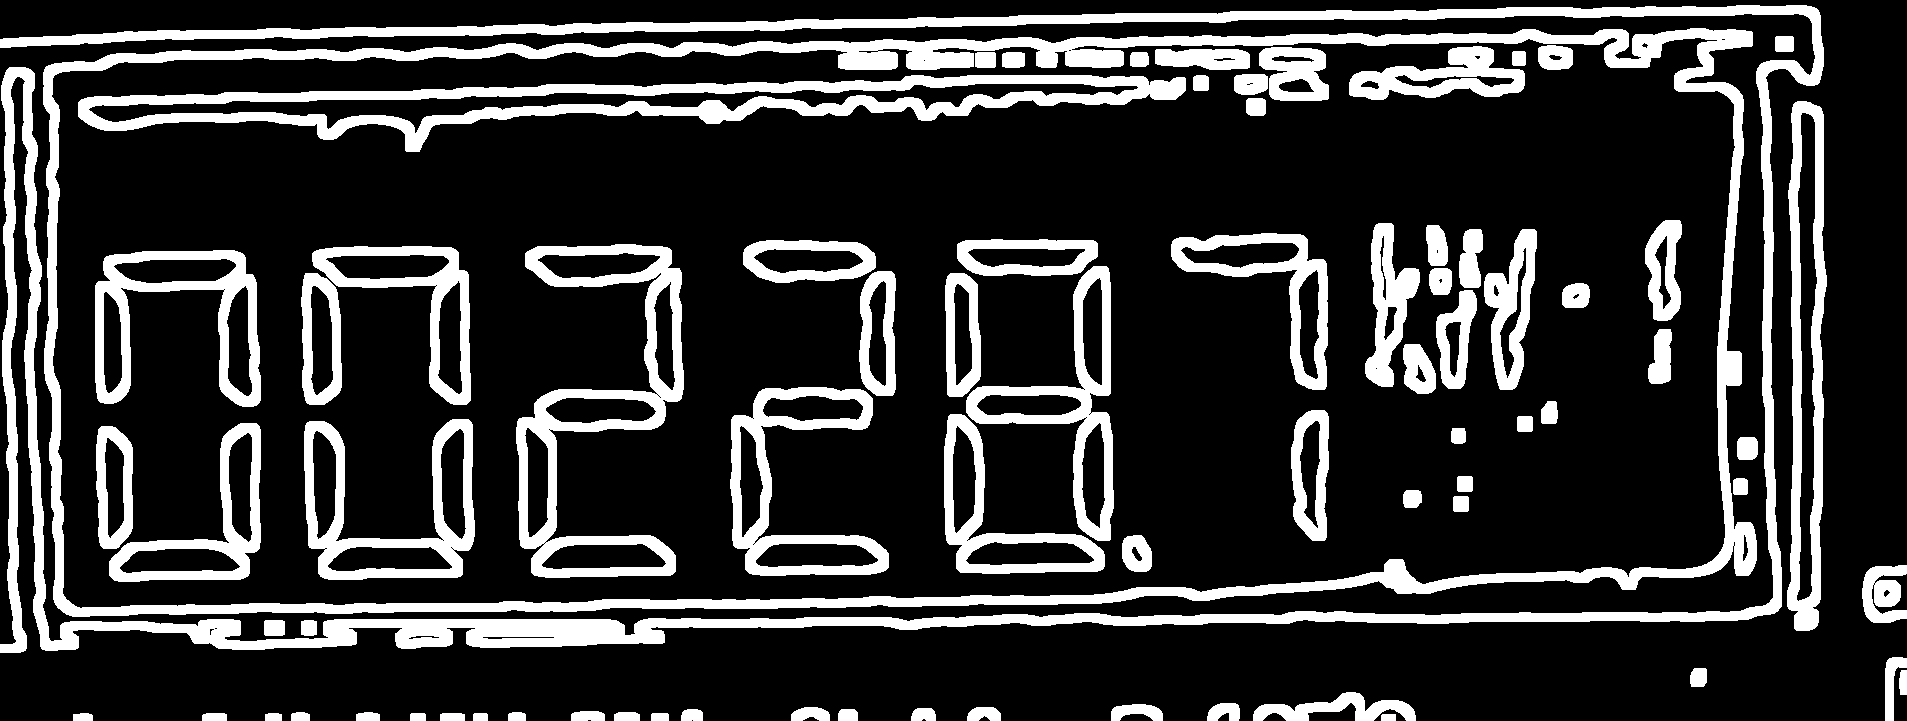

In [ ]:
dilate = cv2.dilate(edges, None, iterations=4)
cv2_imshow(dilate)

Applying Eroding

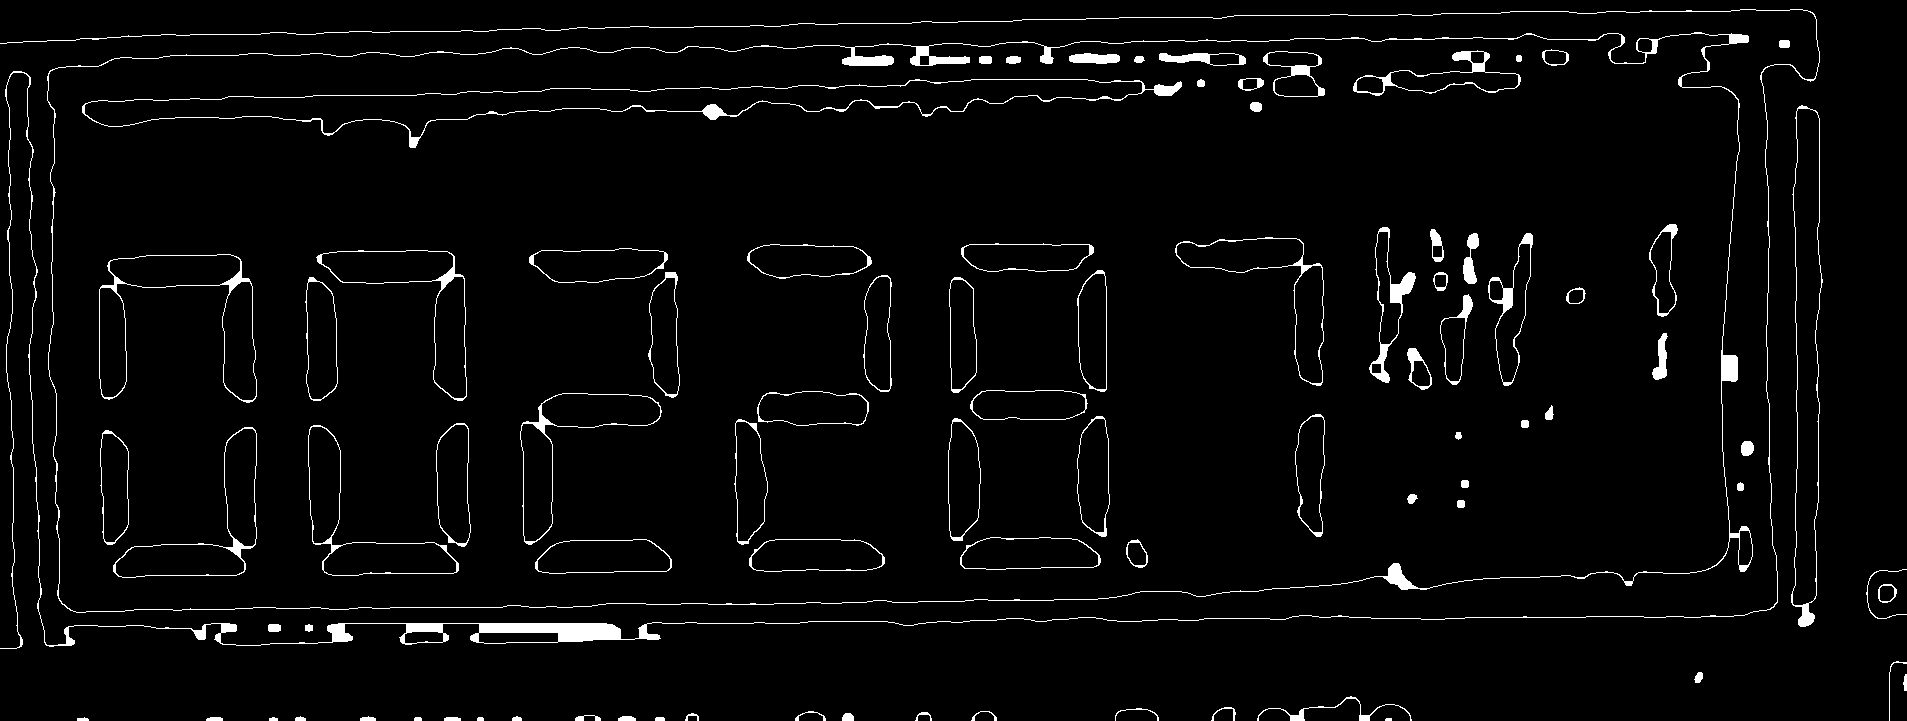

In [ ]:
erode = cv2.erode(dilate, None, iterations=4)
cv2_imshow(erode)

Applying Image Thresholding

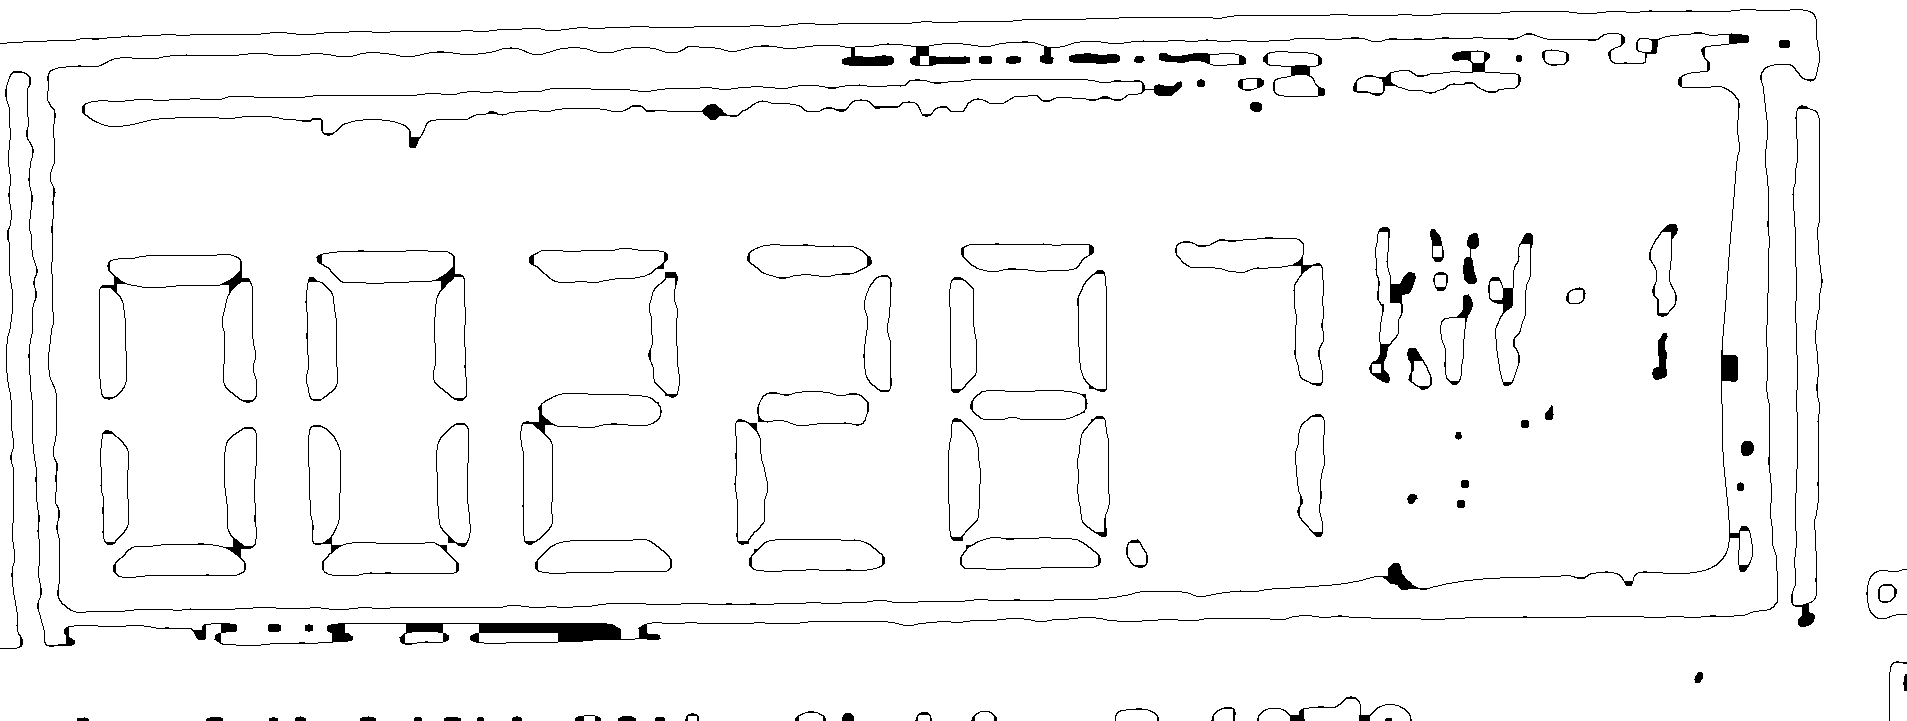

In [ ]:
newimage = cv2.threshold(erode,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
cv2_imshow(newimage)

Applying Tesseract OCR to identify digits in the refined meter image

In [ ]:
temp = pytesseract.image_to_string(newimage)
new = temp[0] + temp[1] + temp[2] + temp[3] + temp[4] "." + temp[5]

Displaying Meter Reading

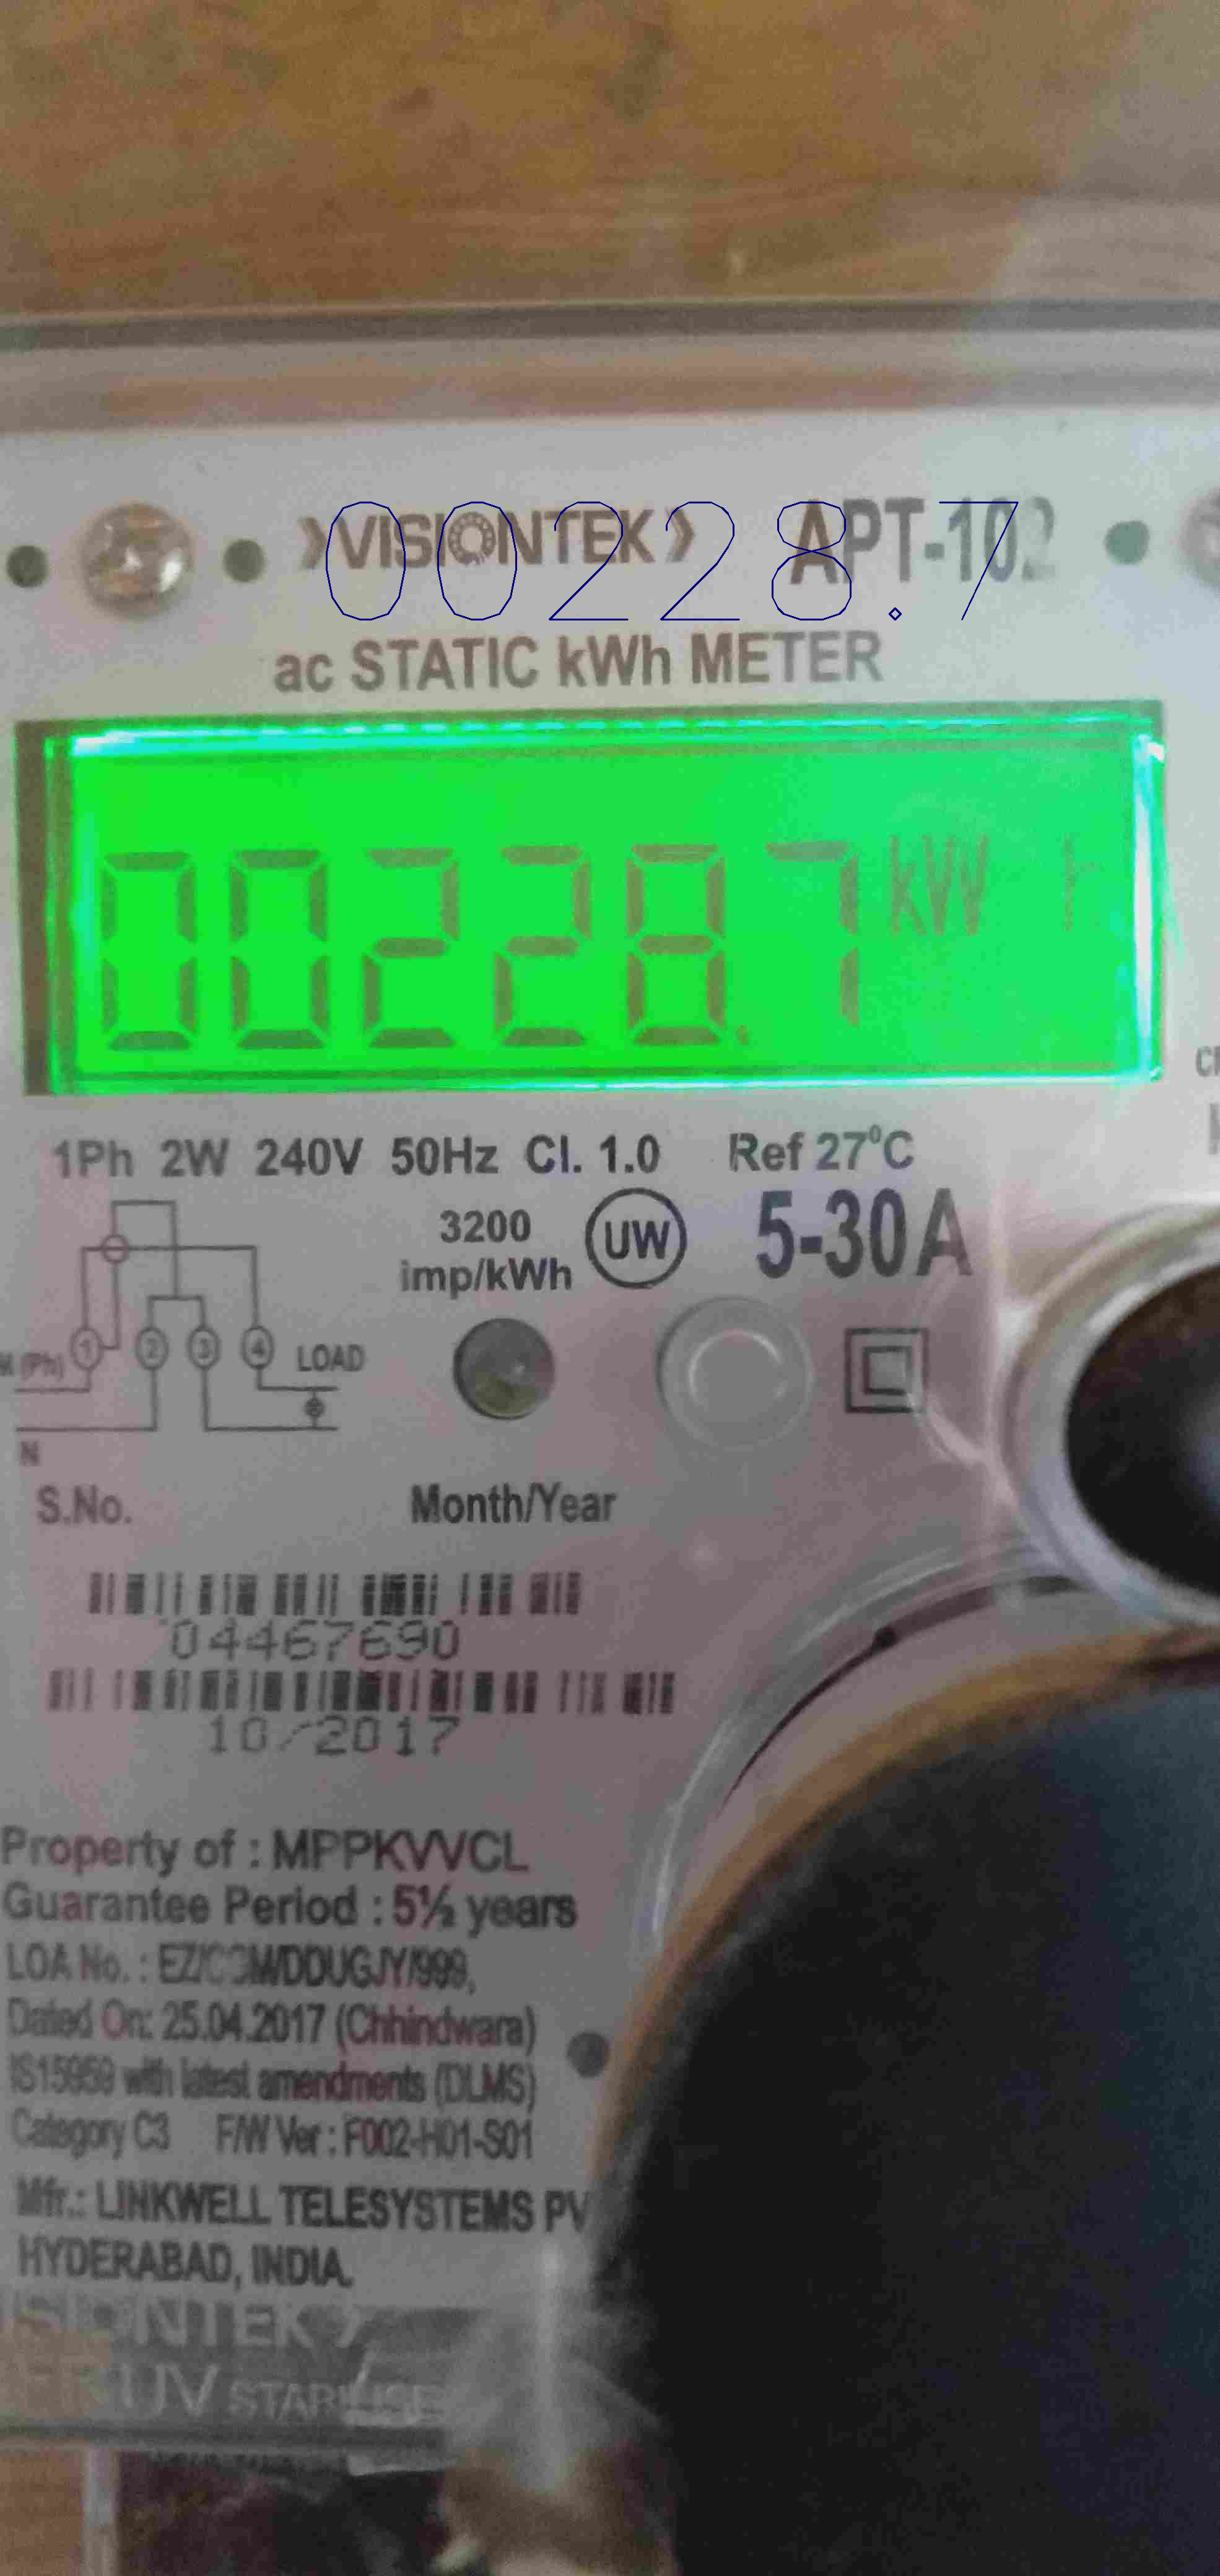

In [ ]:
cv2.putText(img_meter_o, new, (500,1000), cv2.FONT_HERSHEY_SIMPLEX, 9, (128,0,0), 2)
cv2_imshow(img_meter_o)